In [97]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
#%matplotlib notebook


from scipy.stats import norm
from scipy.special import comb

# Relatively Quick Standard Theory Revision

*While this revision may be quite abstract, it is to help clarify notations and sentences used in statistics, since there is standard abusing of notations and unclarity in definitions.*

A Random Variable $X$ is a *measurable funciton* from a *probablity space* $(\Omega, \cal{A}, \mathbb{P})$ into $\mathbb{R}$.  <font color='red'>// Borel or Lebsague</font>   

<font color='red'>// Not precise description of measurability</font>   
Measurable means at least we are able to *measure* (using $\mathbb{P}$) sets which are distinguished (i.e. having different images) by $X$. For example if the space $\Omega = \{0,1\}^2$ modelling tossing a coin twice and $X$ is the value of the first toss only, then measurability of $X$ means that the sets $\{0\}\times\{0,1\}$ and $\{1\}\times\{0,1\}$ are in $\cal{A}$ (hence having a measure under $\mathbb{P}$). If, as in this, example our space in finite and out measure in uniform we need not care about this. 

We call the function $F_X:\mathbb{R}\rightarrow \mathbb{R}$ defined by  
$$F_X(x) = \mathbb{P}\left(\omega \in \Omega | X(\omega) \leq x\right)$$
the <font color='blue'>cumulative distribution function</font>, or simply the distribution. It is easy to see that $F_X$ is non-decreasing and right-continuous.   

We say that two random variables $X,Y$ have the same distribution if they have the same cumulative distribution functions, that is $F_X(x) = F_Y(x)$ for all $x\in\mathbb{R}$.  
We define the <font color='blue'>joint cumulative distributio function</font> by  
$$F_{X,Y}:\mathbb{R}^2\rightarrow \mathbb{R}$$  
$$F_{X,Y}(x,y) = \mathbb{P}\left(\omega\in\Omega | X(\omega)\leq x \quad \mathrm{and}\quad Y(\omega)\leq y\right)$$  
We say that $X$ and $Y$ are <font color='blue'>independent</font> if $F_{X,Y}(x,y)=F_X(x)F_Y(y)$. Generalization to more variables is direct.

<font color='red'>Abuse of Notation:</font> We will frop $\omega \in \Omega$, for example we will write $\mathbb{P}(X<x)$ for $\mathbb{P}(\omega\in\Omega | X(\omega)<x)$. In many opportunities we will write $\Omega$ instead of $(\Omega, \cal{A},\mathbb{P})$ if the latter notation is understood implicitly or not needed.

Having the same distribution means having the same *frequencies* for images of the random variable. Two different random variables can have the same distribution, for example for an unbiased coin toss the random variables $X,Y:\{0,1\}\rightarrow\mathbb{R}$ defined by $X(x)=x$ and $Y(x)=1-x$ have the same distribution. The random variables need not have the same domain (probability space) to have the same distribution.

If $F_X$ is *absolutely continuous* over every bounded closed interval of $\mathbb{R}$ then there exists a unique <font color='blue'>probability density function</font> $f_X$, that is it satisfies  

$$F(b)-F(a) = \int_a^b f_X(x)\mathrm{dx}$$  

For a random variable $X$ we define the <font color='blue'>expectated value</font> or <font color='blue'>expectation</font> as  

$$\mathbb{E}[X] = \int_{\Omega}X\mathrm{d}\mathbb{P} = \int_{\mathbb{R}}xf_X(x)\mathrm{dx}$$
The second equality being whenever $X$ has a probability density function. We define the <font color='blue'>variance</font> of $X$ as  

$$\mathrm{Var}(X)=\mathbb{E}[(X-\mathbb{E}[X])^2] = \int_{\Omega}(X-\mathbb{E}[X])^2\mathrm{d}\mathbb{P} = \int_{\mathbb{R}}(x-\mathbb{E}[X])^2f_X(x)\mathrm{dx}$$

We call the $\mathrm{Std}(X)=\sqrt{\mathrm{Var}(X)}$ the <font color='blue'>standard deviation</font> of $X$.
## Convergence
Let $X_1,X_2,....$ be a sequence of random variables over the same space $(\Omega,\cal{A},\mathbb{P})$. We say that $X_n$ converges almost surely to $X$, denoted $X_n \rightarrow X \quad \mathrm{a.s}$, if  
$$\mathbb{P}\left(\omega \in \Omega | \lim_{n\rightarrow\infty}X_n(\omega)=X(\omega) \right) = 1$$  

<font color='red'>Abuse of Notation:</font> In some cases, as will see in the law of large numbers, $X_i:\Omega_i\rightarrow\mathbb{R}$ don't have the same domain. In this case it is understood implicity the existence of measurable projections $p_i:\Omega\rightarrow\Omega_i$ from some $\Omega$, and that $X_i(\omega)$ means $X_i(p_i(\omega))$ for all $\omega\in\Omega$. <font color='red'>// Did not define general measurability !</font>

Let $X_1,X_2,....$ be a sequence of random variables and $F:\mathbb{R}\rightarrow\mathbb{R}$. We say that $X_i$ distributions converge to the distribution $F$ if  

$$\lim_{n\rightarrow\infty}F_{X_n}(x)=F(x)$$ for all $x\in\mathbb{R}$ <font color='red'>// at continuity points</font>. We say that $X_1,X_2,...$ converges in distribution to the random variable $X$, denotes $X_n\overset{d}{\rightarrow} X$, if $X_1,X_2,...$ distributions converge to the distribution $F_X$.

Almost surely convergence implies convergence in distribution to a random variable (remember, we are in a probability space!), but the reverse is not true.  




## Law of Large Numbers

**Theorem (Law of Large Numbers)**: Let $X_1,X_2,...:\Omega \rightarrow\mathbb{R}$ be independent and identically distributed (i.i.d.) random variables with finite and equal expectation. We have
$$\frac{X_1+X_2+...+X_n}{n} \rightarrow \mathbb{E}[X_1]\quad \mathrm{a.s}$$


Let $X:\Omega\rightarrow\mathbb{R}$. When we say that $X_1,X_2,....$ are independent copies of $X$ we mean that for every $i$ $$X_i:\prod_{k=1}^{\infty}\Omega\rightarrow \mathbb{R}$$
$$X_i((\omega_1,\omega_2,...)) = X(\omega_i)$$

A typical example is the toss of a fair coin. The probability space is $\{0,1\}$ with uniform probability measure. The random variable $X$ is simply $X(x)=x$. If we say that $0$ is for tail and $1$ for head, then the random variable

$$\bar{X_n} = \frac{X_1+X_2+...+X_n}{n}$$  
measures the frequency of heads, where $X_1,X_2,...$ are independent copies of $X$. The law of large numbers tells us that $\bar{X_n}\rightarrow 1/2$ almost surely.

The snippet below simulates this.


<IPython.core.display.Javascript object>


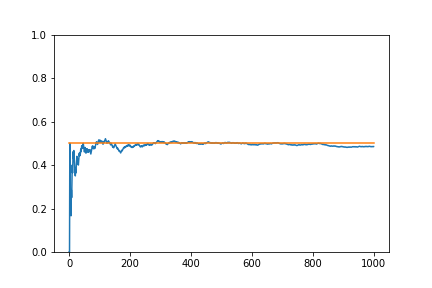

In [50]:
## tossing a fair coin 1000 times.
numberOfTosses = 1000
X_mean = [0]*(numberOfTosses+1)
X_mean[1] = random.randint(0,1)
for i in range(1, numberOfTosses):
    X_mean[i+1] = X_mean[i] + random.randint(0,1)
    X_mean[i] = X_mean[i]/i
X_mean[numberOfTosses] = X_mean[numberOfTosses] / numberOfTosses

### plotting the result
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,numberOfTosses+1), X_mean)
ax.set_ylim([0,1.0])
ax.plot([0,1000], [0.5,0.5])

We can ask *how fast* does the mean converges to the expected value.  
In fact we find that there is a special distribution at the limit.

## Central Limit Theorem

The Normal Distribution $\cal{N}(\mu,\sigma)$ with $\sigma >0$ is defined as 
$$F(x) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^x e^{-(t-\mu)^2/(2\sigma^2)}dt$$  
If $X$ is a random variable whose distribution is the normal distribution $\cal{N}(\mu,\sigma)$ then we have  

$$\mathbb{E}[X] = \mu$$  
$$\mathrm{Std}(X) = \sigma$$  


**Theorem (Central Limit Theorem)**:Let $X_1,X_2,...:\Omega \rightarrow\mathbb{R}$ be independent and identically distributed (i.i.d.) random variables with finite and equal expectation and variance. We have
$$\sqrt{n}\left(\frac{X_1+X_2+...+X_n}{n} - \mathbb{E}[X_1]\right)\bigg{/} \mathrm{Std}(X_1)\overset{d}{\rightarrow} \cal{N}(0,1)$$  
Notice that the covergence is in distribution (check convergence in distribution above).

The left hand side of the convergence in distribution above does not converge almost surely (in our case it diverges to infinity on average as quickly as $\sqrt{n}$).
The standard deviation of the coin toss random variable is $1/2$. The cenral limit theorem tells us that

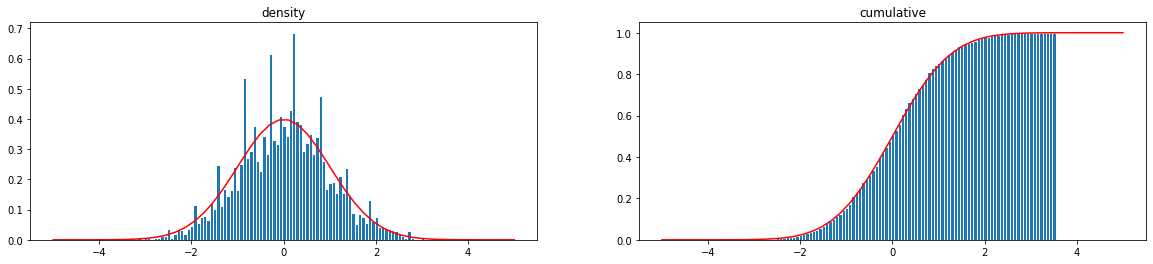

In [21]:
numberOfTrials = 3000
numberOfTossesInTrial = 1000
X_mean = np.zeros(numberOfTrials)#[0]*(numberOfTrials)
for i in range(0, numberOfTrials):
    for j in range(0,numberOfTossesInTrial):
        X_mean[i] = X_mean[i] + random.randint(0,1)
    X_mean[i] = X_mean[i] / numberOfTossesInTrial

### plotting the result
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
#ax.plot(range(0,numberOfTosses+1), X_mean)
#ax.set_ylim([0,1.0])
#ax.set_xlim([-1.0,1.0])
X_plot = np.sqrt(numberOfTossesInTrial)*(X_mean - 1/2)/(1/2)
ax.hist(X_plot, density=True, stacked=True, bins=100, edgecolor='white')

## plot normal distribution density function.
x_points = np.linspace(-5.0,5.0,50)
y_points = (1/np.sqrt(2*np.pi))*np.exp(-x_points**2/2)
ax.plot(x_points, y_points, color='red')
ax.set_title('density')

ax2 = fig.add_subplot(122)
ax2.hist(X_plot, cumulative=True, density=True, stacked=True, bins=100, edgecolor='white')
ax2.plot(x_points, norm.cdf(x_points), color='red')
ax2.set_title('cumulative')
plt.show()

The central limit theorem states that the distribution converges to the normal distribution as simulated on the right graph. However, one can see that the density simulated on the left is not awfully far from the density of the normal distribution, this is in fact true for a random variable with binomial distribution (defined later) as in our case. Statements about the convergence of the denisities towards the normal distribution density are call local limit theorems. One should keep in mind that the central limit theorem also holds for random variables which do not have density.  

If in addition to the conditions in the central limit theorem one has $\mathbb{E}[X_1^3]$ is finite (which is true in our example above), then Berry–Esseen theorem states that the distribution of the mean converges to the normal distribution at least as fast as $\sqrt{n}$.

### Fair Coin tests

Suppose one gave you a coin and claims it is fair. You flip the coin 100 times to get 61 heads and 39 tails, what can you say about the coin? 

For a 100 times coin flip the result (or event) $T,T,...,T$ is equally probable to any other single result including 61 heads and 39 tails. However, the number of $H$s in a 100 times flip is not uniform, that is getting only 1 $H$ is not equally probable to getting 61 $H$s. It is quite *rare* to get only 1 $H$ in a 100 times flip. One probably is ready to claim that the coin is not fair if he only gets such a rare result.  

So what we can say is whether such a result as 61 Heads and 39 tails is *rare* or not. If it is rare we convinced that the coin is not fair.  

Thus to continue we have to agree on what the word *rare* means. For us a rare event is one which is among the least $5\%$ probable events. Notice that this agreement assumes (<font color='red'>//needed?</font>) the existance of a density function for the random variables being tested to be able to compare indiviual events and hence being able to say the word *least*.  

Following this, to decide whether an event is rare we calculate the probability of having this event or less probable, if this probability is less than $5\%$ we deem the event as rare. We call this probability <font color='blue'>p-value</font>.

Let's assume the coin is fair. If we accept the central limit theorem approximation for 100 tosses, we find the p-value

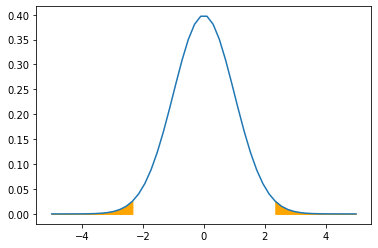

p-value = 0.02780689502699718


In [224]:
CLT_LHS = np.sqrt(100)*(61/100 - 1/2)/(1/2)# central limit theorem left hand side
#plot rarer events.
x = np.linspace(-5.0,5.0,50)
y = norm.pdf(np.linspace(-5.0,5.0,50))
plt.plot(x,y)
i = x > CLT_LHS
plt.fill_between(x[i], 0, y[i], color='orange')
plt.fill_between(-x[i], 0, y[i], color='orange')
plt.show()

p_value = 2*(1-norm.cdf(CLT_LHS))
print(f'p-value = {p_value}')

We found that it is only among the least $2.8\%$ events, hence we deem the coin unfair. Above in the normal distribution we shaded the area representing the probability $2.8\%$ of the least probable events.  

Without the central limit theorem we can simulate 100 tosses of a fair coin and approximate the probability of having the 61 heads or more less probable events. Below we found that getting between 61 heads does not seem to exceed around $3\%$, which is rare.

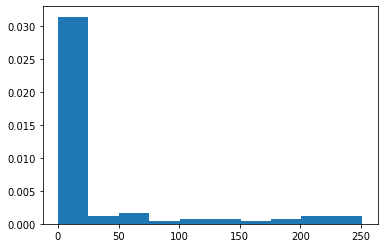

p-value = 0.029666666666666668


In [254]:
numberOfTossesInTrial = 100
numberOfTrials = 3000

result_count = np.zeros(numberOfTossesInTrial)
for i in range(0, numberOfTrials):
    result = 0
    for j in range(0,numberOfTossesInTrial):
        result = result + random.randint(0,1)
    result_count[result] += 1

plt.hist(result_count, density=True)
plt.show()

# The probability we get 58 to 62 heads.
p_value = np.sum(result_count[result_count <= result_count[61]])/numberOfTrials
print(f'p-value = {p_value}')

Since we know the distribution and it is simple we can go and calculate the probability of getting $m$ heads wich is  
$$\binom{100}{m}2^{-100}$$  
Therefore the probability of having 61 heads or rarer events (p-value) is
$$\sum_{m=61}^{100}\binom{100}{m}2^{-100} + \sum_{m=0}^{39}\binom{100}{m}2^{-100}$$  
which is $3.5\%$ as below which is indeed rare.

In [253]:
result = 0
for i in range(61, 101):
    result += comb(100,i)

# because the two sums are equal
result = 2*result

result = result * 2**-100
print(f'p-value = {result}')

p-value = 0.0352002002177048


<font color='red'>Caution:</font> We calculated and approximated the p-value above, but all of this is build of the assumption that the coin is fair. p-value of an event is the probabily of getting this event or less probable events *given a probability distribution*. What we did is that we rejected the normal distribution of the means of the tosses because the result we got was rare in such a distribution. Rejecting this distribution means rejecting the uniform distribution of the results of the coins (i.e. a fair coin).

Let's have another example. Say you tossed a coin 150 times. You counted and found the coin prefectly landed 50 times on head and 50 times on tail ! But you noticed you never got 4 consecutive heads nor tails in a row, can we say something about the coin? As in the mean case above while every indivisual event is equally probable the length of the longest consecutive $H$ or $T$ chain is not uniform.

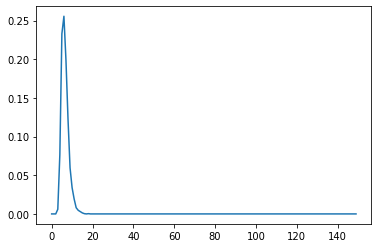

p-value = 0.015666666666666666


In [255]:
numberOfTosses = 150
numberOfTrials = 3000
countOfConsecutiveHs = np.zeros(numberOfTosses)
countOfConsecutiveTs = np.zeros(numberOfTosses)

for i in range(0, numberOfTrials):
    currentHChainLength = 0
    maxHChainLength = 0
    currentTChainLength = 0
    maxTChainLength = 0
    for j in range(0,numberOfTosses):
        toss = random.randint(0,1)
        if toss == 1: # i.e. head
            currentTChainLength = 0
            currentHChainLength += 1
            if maxHChainLength < currentHChainLength:
                maxHChainLength = currentHChainLength
        else: # tail
            currentHChainLength = 0
            currentTChainLength += 1
            if maxTChainLength < currentTChainLength:
                maxTChainLength = currentTChainLength

    countOfConsecutiveHs[maxHChainLength] += 1
    countOfConsecutiveTs[maxTChainLength] += 1

maxChainLength = np.maximum(countOfConsecutiveHs, countOfConsecutiveTs)
plt.plot(range(0,numberOfTosses), maxChainLength/numberOfTrials)
plt.show()

# calculate the p-value (assuming fairness of the coin of course)
p_value = np.sum(maxChainLength[maxChainLength <= maxChainLength[3]])/numberOfTrials
print(f'p-value = {p_value}')

There is less than $2\%$ of not having 4 consecutive $H$s or $T$s which is rare according to our definition. Hence we reject the hypothesis that the coin is fair.

TO DO:
* What is Random about Random Variables ?
* Generate distributions programatically.
* Statistical Tests.
* Practical examples.

References: